### Setup

 - check for gpu status

In [29]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse
from cellpose import models, core

use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

# call logger_setup to have output of cellpose written
from cellpose.io import logger_setup
logger_setup();

2023-12-07 10:31:48,997 [INFO] ** TORCH CUDA version installed and working. **
>>> GPU activated? 1
creating new log file
2023-12-07 10:31:49,001 [INFO] WRITING LOG OUTPUT TO C:\Users\CaiLab\.cellpose\run.log
2023-12-07 10:31:49,003 [INFO] 
cellpose version: 	2.2.2 
platform:       	win32 
python version: 	3.8.17 
torch version:  	1.12.0


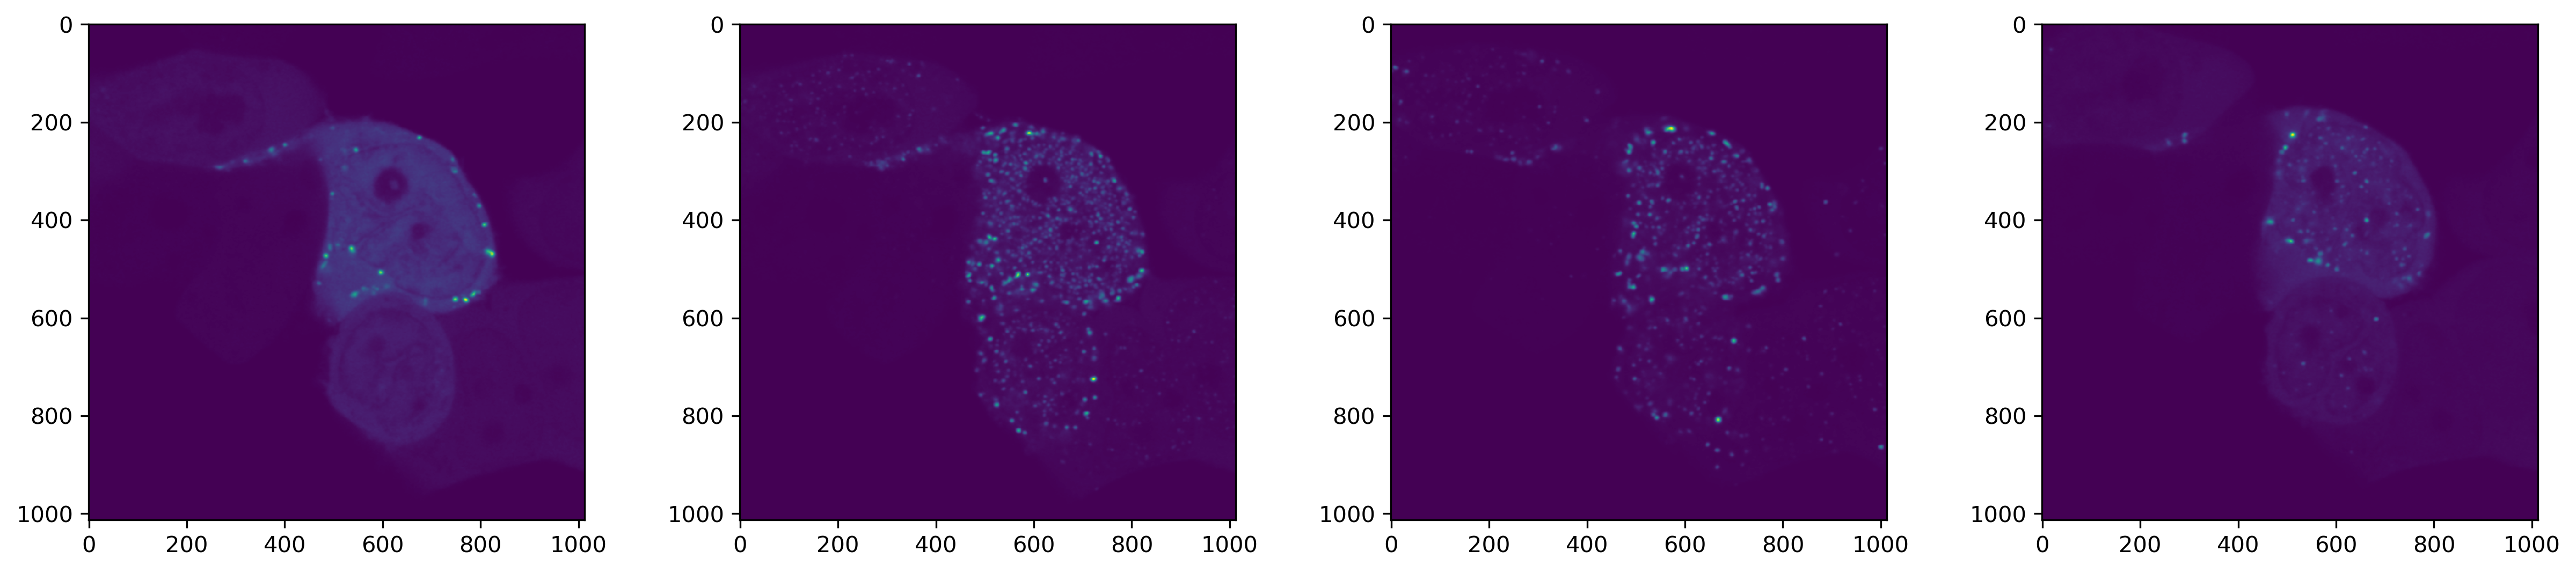

In [36]:
files = ["file.ome.tif","file2.ome.tif","file10.ome.tif","file20.ome.tif"]
imgs = [skimage.io.imread(f) for f in files]
nimg = len(imgs)

plt.figure(figsize=(20,4))
for k,img in enumerate(imgs):
  plt.subplot(1,4,k+1)
  plt.imshow(img)

In [31]:
# setup napari to check if the UI is good
import napari
viewer = napari.view_image(skimage.io.imread("./file_full5.tif"), colormap='red')

2023-12-07 10:37:19,913 [INFO] >>>> loading model ./CP_testJIL_epoch500
2023-12-07 10:37:19,916 [INFO] ** TORCH CUDA version installed and working. **
2023-12-07 10:37:19,919 [INFO] >>>> using GPU


2023-12-07 10:37:20,109 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2023-12-07 10:37:20,110 [INFO] >>>> model diam_labels =  296.739 (mean diameter of training ROIs)


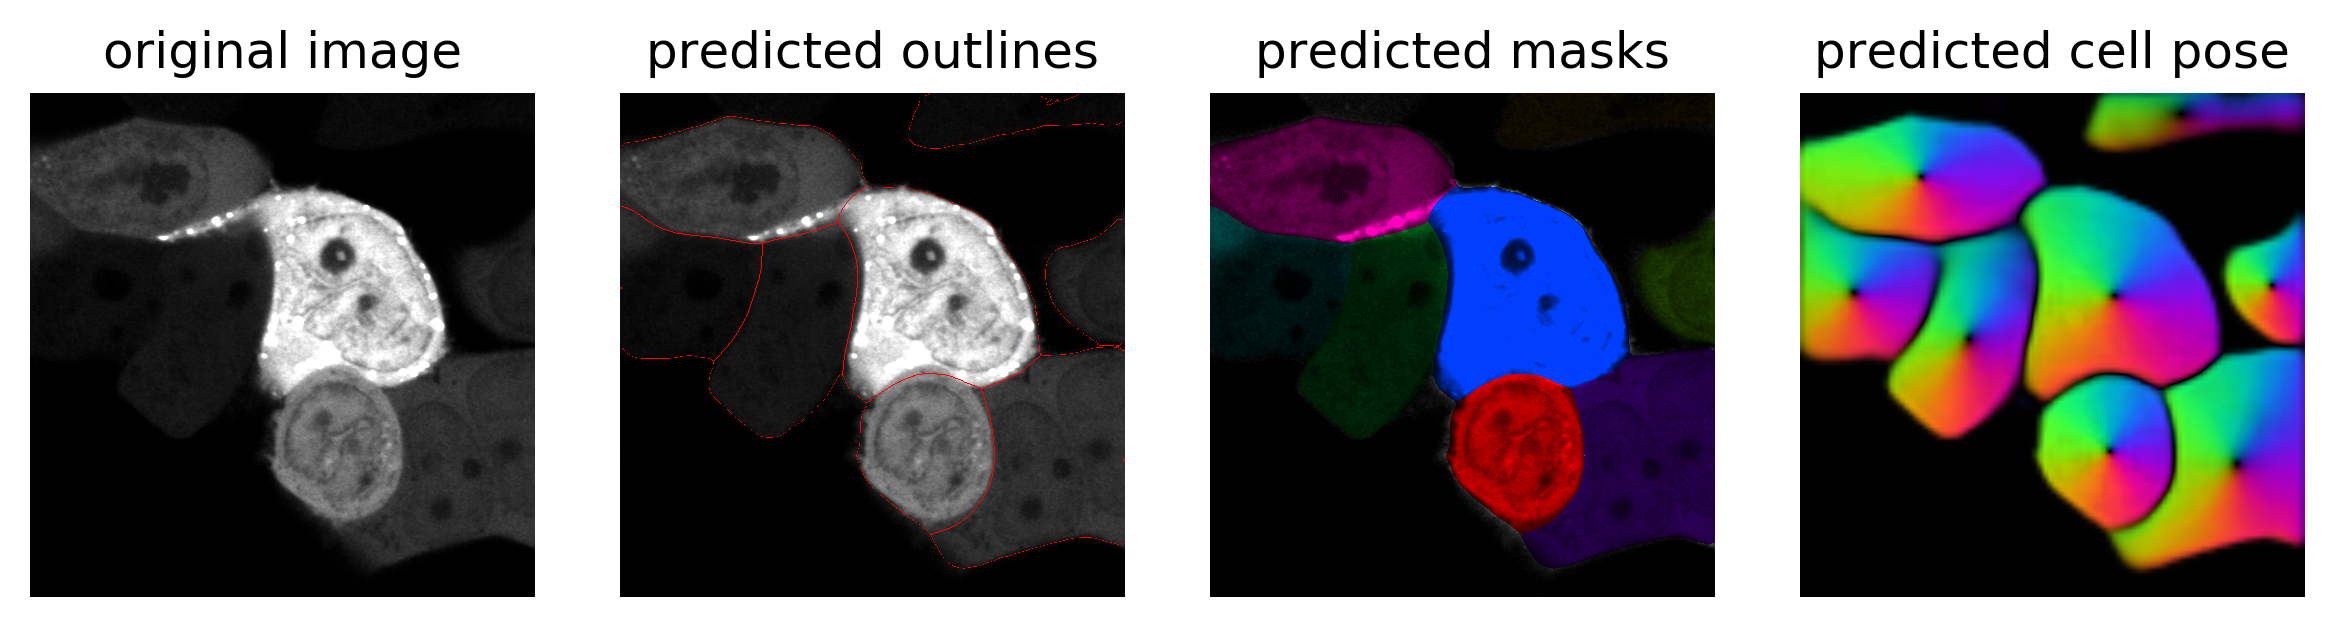

In [42]:
# RUN CELLPOSE
imgs = [skimage.io.imread(files[0])]
imgs_2D = imgs

from cellpose import models
# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
# declare model
model = models.CellposeModel(gpu=True, 
                             pretrained_model="./CP_testJIL_epoch500")
# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images
# use model diameter if user diameter is 0
diameter = model.diam_labels 
# run model on test images
masks, flows, styles = model.eval(imgs_2D, 
                                  channels=channels,
                                  diameter=diameter,
                                  )
# DISPLAY RESULTS
from cellpose import plot
nimg = len(imgs_2D)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(8,3))
    # plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=channels[idx])
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=channels)
    plt.tight_layout()
    plt.show()